In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pillow_heif

## WEEK 1

(note week 2 is below)

In [5]:
img1_path = '../data/images/01.heic'
img2_path = '../data/images/02.heic'

In [6]:
def load_image(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in ['.heic', '.heif']:
        heif_file = pillow_heif.read_heif(path)
        img = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data, "raw")
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return img_cv


def detect_features(detector, img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, desc = detector.detectAndCompute(gray, None)
    return kp, desc

def matching(desc1, desc2, ratio=0.75):
    if desc1 is None or desc2 is None:
        return []

    if desc1.dtype != np.float32:
        desc1 = desc1.astype(np.float32)
        desc2 = desc2.astype(np.float32)
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    matcher = cv2.FlannBasedMatcher(index_params, search_params)
    knn_matches = matcher.knnMatch(desc1, desc2, k=2)

    good = []
    for m_n in knn_matches:
        if len(m_n) < 2:
            continue
        m, n = m_n
        if m.distance < ratio * n.distance:
            good.append(m)
    return good

In [7]:
img1 = load_image(img1_path)
img2 = load_image(img2_path)

detector = cv2.SIFT_create(nfeatures=5000)

kp1, desc1 = detect_features(detector, img1)
kp2, desc2 = detect_features(detector, img2)

print("detectorr: SIFT")
print(f"img 1 keypoints: {len(kp1)} ,,,, img 2 keypoints: {len(kp2)}")

detectorr: SIFT
img 1 keypoints: 5000 ,,,, img 2 keypoints: 5000


In [8]:
good_matches = matching(desc1, desc2, ratio=0.75)
print(f"goood matches after filtering: {len(good_matches)}")

match_img = cv2.drawMatches(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

goood matches after filtering: 707


## Below Are the Picture USED FOR WEEK2

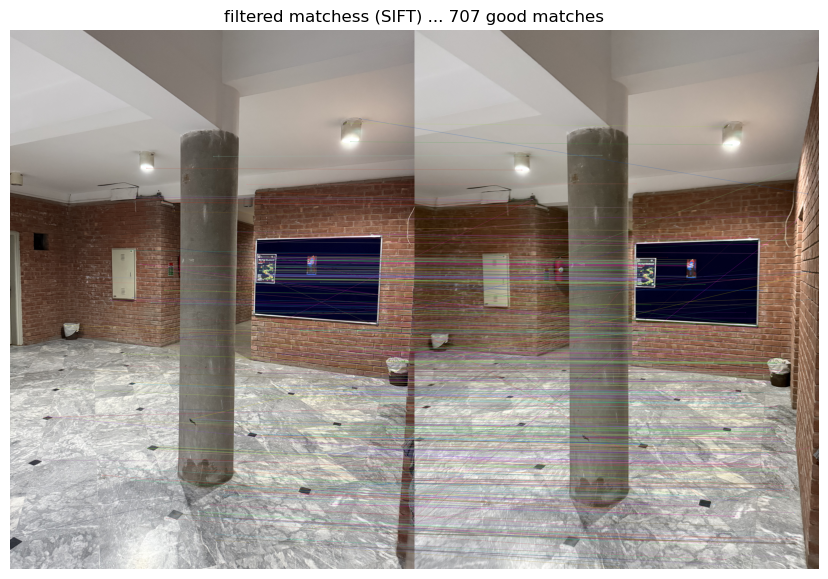

In [9]:
plt.figure(figsize=(14,7))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title(f"filtered matchess (SIFT) ... {len(good_matches)} good matches")
plt.axis('off')
plt.show()

*Now Showing matches for multiple Pairs of Images*

In [12]:
image_dir = "../data/images"
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

selected_pairs = [
    (5, 6),
    (6, 7),
    (9, 10),
    (12, 13)
]

ratio_test = 0.75 

pair: 5-6 ... keypoints: 5000-5000 ... ggood matches: 1780


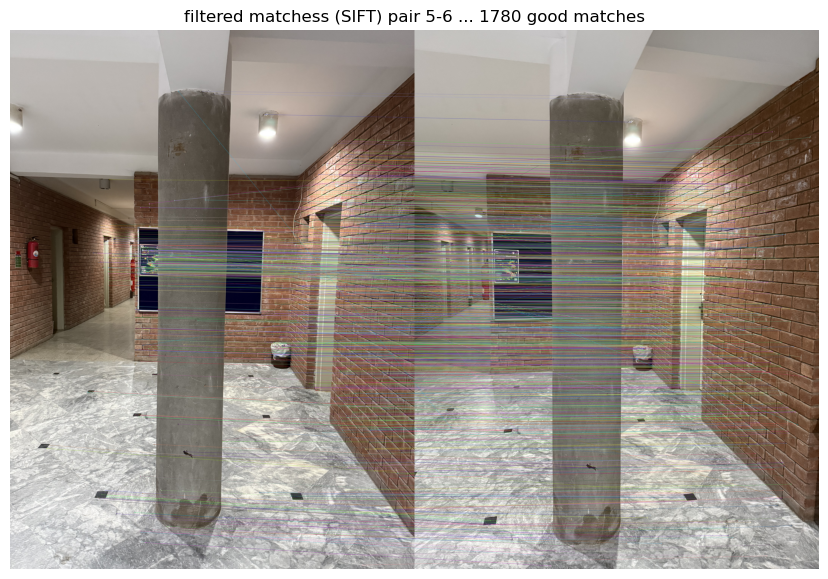

saved match image: outputs\matches_5_6.png

pair: 6-7 ... keypoints: 5000-5000 ... ggood matches: 1521


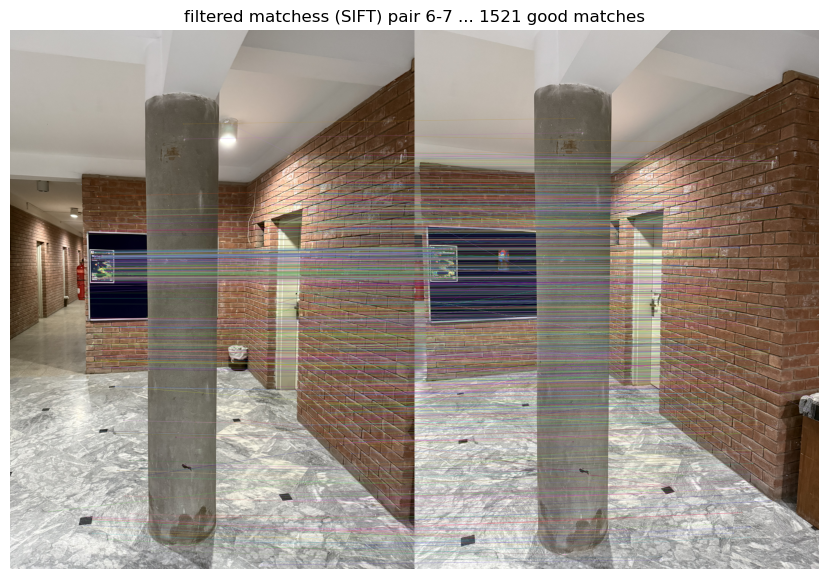

saved match image: outputs\matches_6_7.png

pair: 9-10 ... keypoints: 5000-5000 ... ggood matches: 1599


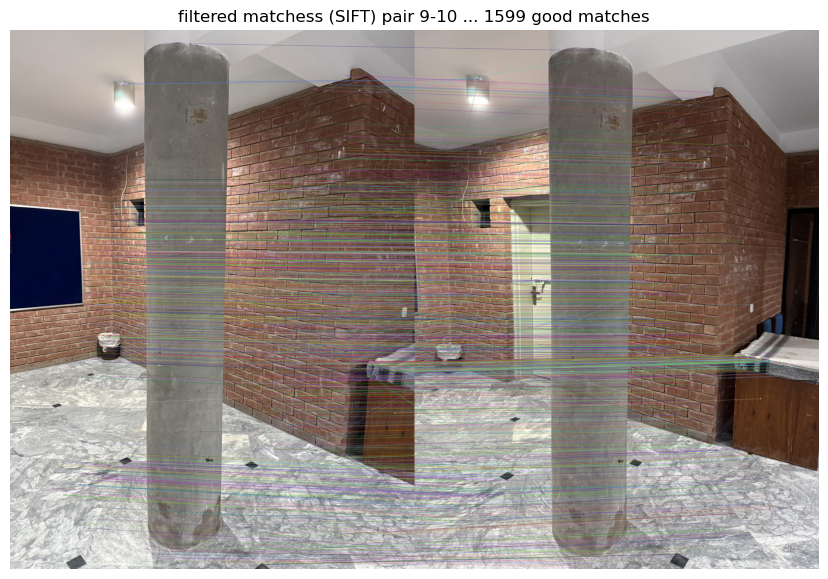

saved match image: outputs\matches_9_10.png

pair: 12-13 ... keypoints: 5003-5000 ... ggood matches: 1613


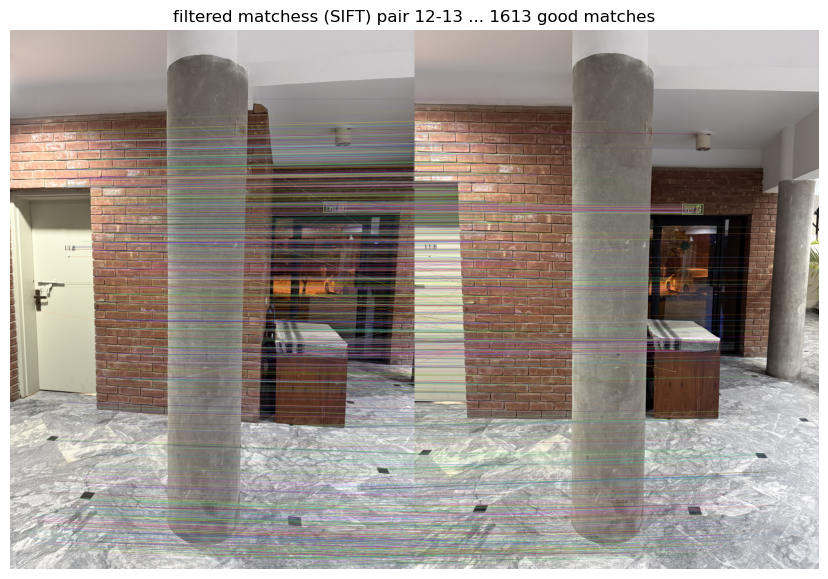

saved match image: outputs\matches_12_13.png



In [13]:
detector = cv2.SIFT_create(nfeatures=5000)

for i,j in selected_pairs:
    img1_file = os.path.join(image_dir, f"{i:02d}.heic")
    img2_file = os.path.join(image_dir, f"{j:02d}.heic")
    
    img1 = load_image(img1_file)
    img2 = load_image(img2_file)
    
    kp1, desc1 = detect_features(detector, img1)
    kp2, desc2 = detect_features(detector, img2)
    
    good_matches = matching(desc1, desc2, ratio_test)
    
    print(f"pair: {i}-{i+1} ... keypoints: {len(kp1)}-{len(kp2)} ... ggood matches: {len(good_matches)}")
    
    match_img = cv2.drawMatches(
        img1, kp1, img2, kp2, good_matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    
    plt.figure(figsize=(14,7))
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    plt.title(f"filtered matchess (SIFT) pair {i}-{i+1} ... {len(good_matches)} good matches")
    plt.axis('off')
    plt.show()

    out_img_path = os.path.join(output_dir, f"matches_{i}_{i+1}.png")
    cv2.imwrite(out_img_path, match_img)
    print(f"saved match image: {out_img_path}\n")

## Week 2

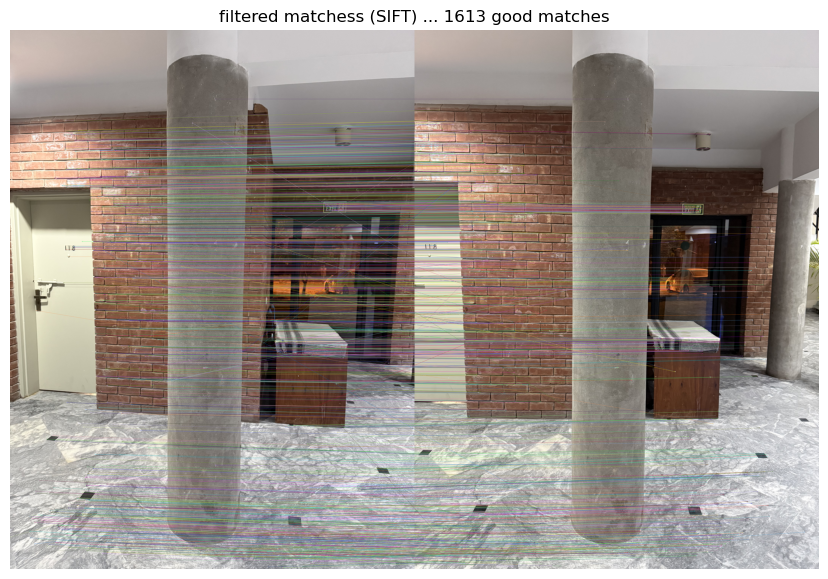

In [14]:
plt.figure(figsize=(14,7))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title(f"filtered matchess (SIFT) ... {len(good_matches)} good matches")
plt.axis('off')
plt.show()

In [15]:
image_dir = "../data/images"
detector = cv2.SIFT_create(nfeatures=5000)
ratio_test = 0.75

In [16]:
i, j = 5,6 
print(f"Using best image pair: {i} and {j}")

img1_path = os.path.join(image_dir, f"{i:02d}.heic")
img2_path = os.path.join(image_dir, f"{j:02d}.heic")

# img1_path = os.path.join(image_dir, f"img{i}.heic")
# img2_path = os.path.join(image_dir, f"img{j}.heic")

image1 = load_image(img1_path)
image2 = load_image(img2_path)

keypoints1, desc1 = detect_features(detector, image1)
keypoints2, desc2 = detect_features(detector, image2)

matches = matching(desc1, desc2, ratio_test)

print(f"Total keypoints: {len(keypoints1)} vs {len(keypoints2)}")
print(f"Good matches found: {len(matches)}")

points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

print("points shape:", points1.shape)
print("points shape:", points2.shape)


Using best image pair: 5 and 6
Total keypoints: 5000 vs 5000
Good matches found: 1776
points shape: (1776, 2)
points shape: (1776, 2)


## Build intrinsic matrix K

In [17]:
h, w = image1.shape[:2]
f = w
K = np.array([[f, 0, w/2],
              [0, f, h/2],
              [0, 0, 1]], dtype=np.float64)
print("Intrinssic Matrix K:  \n", K)


Intrinssic Matrix K:  
 [[4.284e+03 0.000e+00 2.142e+03]
 [0.000e+00 4.284e+03 2.856e+03]
 [0.000e+00 0.000e+00 1.000e+00]]


## Estimate Essential Matrix with RANSAC

In [18]:
E, mask_E = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
inliers = mask_E.ravel().astype(bool)
print("Estimated Essential Matrix:\n", E)
print("Inlier count:", np.sum(inliers))


Estimated Essential Matrix:
 [[ 0.0038434  -0.01602902  0.0160569 ]
 [-0.12693991  0.00443331 -0.69540733]
 [-0.03826991  0.70579058  0.01186574]]
Inlier count: 861


## Recover relative pose (R, t) and disambiguate

In [19]:
pts1_in = points1[inliers]
pts2_in = points2[inliers]

_, R, t, mask_pose = cv2.recoverPose(E, pts1_in, pts2_in, K)
print("Recovered Rotation R:\n", R)
print("Recovered Translation t:\n", t)

Recovered Rotation R:
 [[ 0.97895051  0.0329614  -0.20141859]
 [-0.03116973  0.99944133  0.0120613 ]
 [ 0.20170362 -0.00552926  0.979431  ]]
Recovered Translation t:
 [[0.99947033]
 [0.02346249]
 [0.02255133]]


## Triangulate 3D points

In [20]:
cheirality_mask = mask_pose.ravel().astype(bool)
pts1_final = pts1_in[cheirality_mask]
pts2_final = pts2_in[cheirality_mask]

print(f"Points passing cheirality check: {np.sum(cheirality_mask)}/{len(cheirality_mask)}")

P0 = K @ np.hstack((np.eye(3), np.zeros((3,1))))
P1 = K @ np.hstack((R, t))
pts4D = cv2.triangulatePoints(P0, P1, pts1_final.T, pts2_final.T)
pts3D = (pts4D[:3] / pts4D[3]).T

valid_mask = np.isfinite(pts3D).all(axis=1)
pts3D = pts3D[valid_mask]
pts1_final = pts1_final[valid_mask]
pts2_final = pts2_final[valid_mask]

print("Triangulated 3D points:", pts3D.shape)

Points passing cheirality check: 861/861
Triangulated 3D points: (861, 3)


## Reprojection

In [21]:
def reprojection_errors(pts3d, K, R, t, pts1, pts2):
    pts_h = np.hstack((pts3d, np.ones((pts3d.shape[0], 1))))
    P0 = K @ np.hstack((np.eye(3), np.zeros((3,1))))
    P1 = K @ np.hstack((R, t))
    proj0 = (P0 @ pts_h.T).T
    proj1 = (P1 @ pts_h.T).T

    proj0 = proj0[:, :2] / np.clip(proj0[:, 2:3], 1e-6, None)
    proj1 = proj1[:, :2] / np.clip(proj1[:, 2:3], 1e-6, None)
    err0 = np.linalg.norm(proj0 - pts1, axis=1)
    err1 = np.linalg.norm(proj1 - pts2, axis=1)
    return (err0 + err1) / 2.0


reproj_err = reprojection_errors(pts3D, K, R, t, pts1_final, pts2_final)
good_idx = (reproj_err < 5.0) & (pts3D[:,2] > 0)
pts3D_filtered = pts3D[good_idx]

print(f"Points after reprojection filtering: {pts3D_filtered.shape}")

Points after reprojection filtering: (861, 3)


## Visualization

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


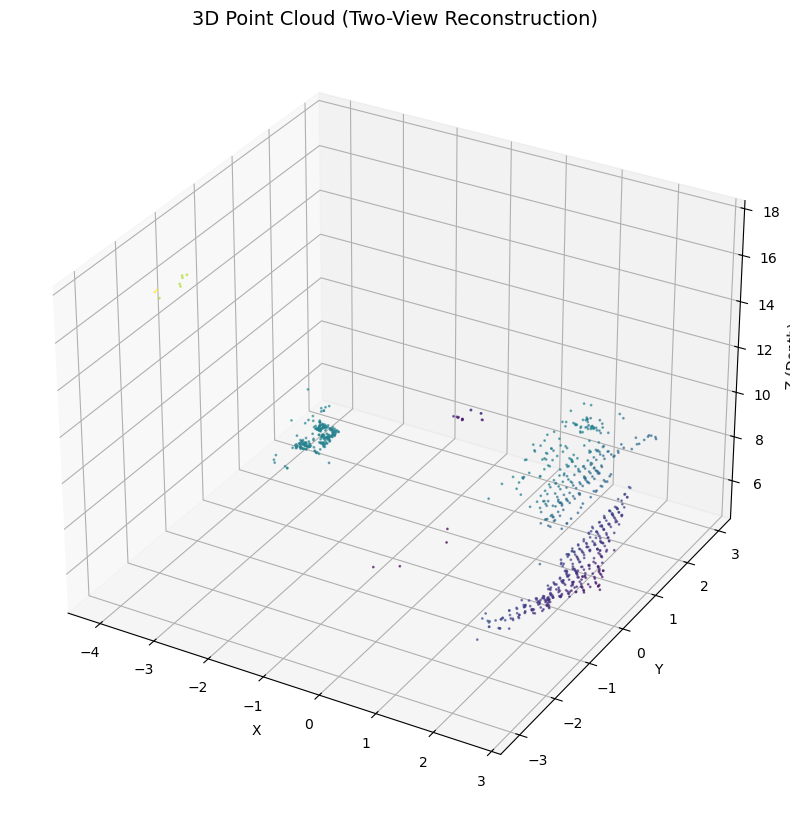

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts3D_filtered[:, 0], pts3D_filtered[:, 1], pts3D_filtered[:, 2], 
           c=pts3D_filtered[:, 2], cmap='viridis', s=1, alpha=0.6)
ax.set_title("3D Point Cloud (Two-View Reconstruction)", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (Depth)")
plt.show()


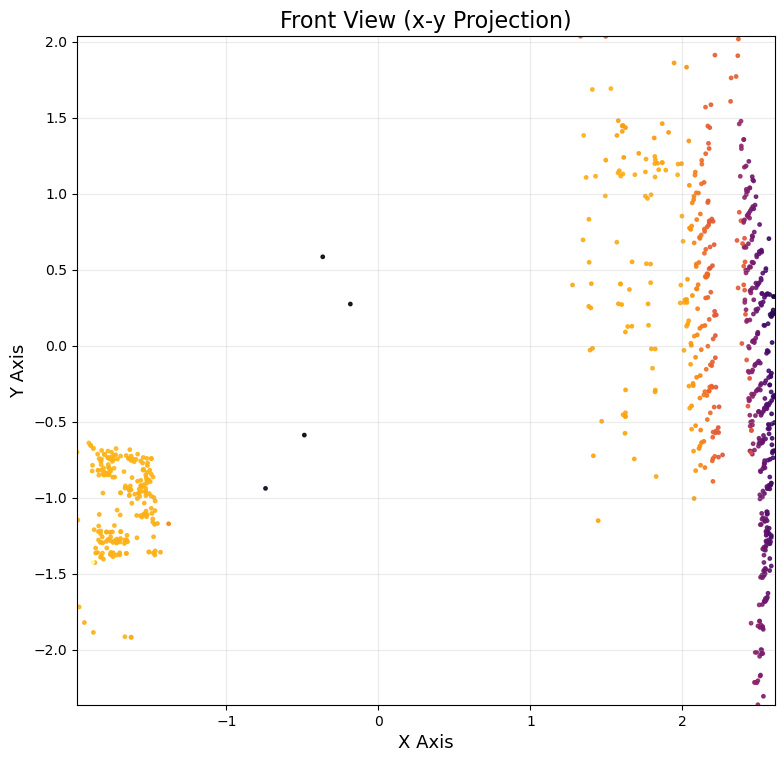

In [23]:
# --- Extract axes from point cloud ---
coord_x = pts3D[:, 0]
coord_y = pts3D[:, 1]

# --- Remove extreme outliers using percentile clipping ---
x_lo, x_hi = np.percentile(coord_x, [2, 98])
y_lo, y_hi = np.percentile(coord_y, [2, 98])

valid_xy = (
    (coord_x >= x_lo) & (coord_x <= x_hi) &
    (coord_y >= y_lo) & (coord_y <= y_hi)
)

pts_xy_clipped = pts3D[valid_xy]

# --- Extract filtered coordinates ---
x_vals = pts_xy_clipped[:, 0]
y_vals = pts_xy_clipped[:, 1]
z_vals = pts_xy_clipped[:, 2]

# --- Plot front-view scatter ---
plt.figure(figsize=(9, 9))
plt.scatter(
    x_vals, y_vals,
    s=6,
    c=z_vals,
    cmap="inferno",
    alpha=0.85
)

plt.title("Front View (x-y Projection)", fontsize=16)
plt.xlabel("X Axis", fontsize=13)
plt.ylabel("Y Axis", fontsize=13)

plt.xlim(x_vals.min(), x_vals.max())
plt.ylim(y_vals.min(), y_vals.max())

plt.gca().set_aspect("equal", "box")
plt.grid(alpha=0.25)

plt.show()

In [49]:
colors1 = np.array([image1[int(pt[1]), int(pt[0])] for pt in pts1_final[good_idx]])
colors1_normalized = colors1.astype(np.float64) / 255.0
colors1_rgb = colors1_normalized[:, [2, 1, 0]]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pts3D_filtered)
pcd.colors = o3d.utility.Vector3dVector(colors1_rgb)

ply_path = "point_cloud.ply"
o3d.io.write_point_cloud(ply_path, pcd)
print(f"Saved colored PLY: {ply_path}")
print(f"   Total points: {len(pts3D_filtered)}")

Saved colored PLY: point_cloud.ply
   Total points: 861


In [25]:
print("\nLaunching Open3D viewer...")
print("Controls: Mouse to rotate, scroll to zoom, Ctrl+mouse to pan")
o3d.visualization.draw_geometries(
    [pcd],
    window_name="Two-View Reconstruction",
    width=1024,
    height=768,
    point_show_normal=False
)


Launching Open3D viewer...
Controls: Mouse to rotate, scroll to zoom, Ctrl+mouse to pan


## WEEK 3

In [36]:
from scipy.optimize import least_squares

In [ ]:

def load_image(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in ['.heic', '.heif']:
        heif_file = pillow_heif.read_heif(path)
        img = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data, "raw")
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        return img_cv
    return cv2.imread(path)

def detect_features(detector, img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, desc = detector.detectAndCompute(gray, None)
    return kp, desc

def match_features(desc1, desc2, ratio=0.75):
    if desc1 is None or desc2 is None or len(desc1) < 2 or len(desc2) < 2:
        return []

    if desc1.dtype != np.float32: desc1 = desc1.astype(np.float32)
    if desc2.dtype != np.float32: desc2 = desc2.astype(np.float32)

    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    matcher = cv2.FlannBasedMatcher(index_params, search_params)
    knn_matches = matcher.knnMatch(desc1, desc2, k=2)

    good = []
    for m_n in knn_matches:
        if len(m_n) < 2: continue
        m, n = m_n
        if m.distance < ratio * n.distance:
            good.append(m)
    return good



In [ ]:
def get_intrinsics_from_exif(path, default_shape=None, fallback_factor=1.0):

    ext = path.lower().split('.')[-1]
    if ext in ['heic', 'heif']:
        heif_file = pillow_heif.read_heif(path)
        img = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data, 'raw')
        if 'exif' in heif_file.info:
            img.info['exif'] = heif_file.info['exif']
        

    w, h = img.size
    focal_px = None
    exif_data = None
    if hasattr(img, '_getexif'):
        raw = img._getexif()
        if raw:
            exif_data = {ExifTags.TAGS.get(k,k): v for k, v in raw.items()}

    if exif_data:
        if 'FocalLengthIn35mmFilm' in exif_data:
            f_35 = exif_data['FocalLengthIn35mmFilm']
            focal_px = (f_35 / 36.0) * w
        elif 'FocalLength' in exif_data:
            f_mm = exif_data['FocalLength']
            if isinstance(f_mm, tuple):
                f_mm = float(f_mm[0]) / float(f_mm[1])

            print(f"found FocalLength (mm) = {f_mm}; skipping direct mm->px conversion.")

    if focal_px is None:
        focal_px = w * fallback_factor

    K = np.array([[focal_px, 0, w/2.0],
                  [0, focal_px, h/2.0],
                  [0, 0, 1]], dtype=np.float64)
    return K


In [ ]:

camera_poses = {}

points_3d = []

points_colors = []

map_2d_3d = {}

image_dir = "../data/images"
image_files = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.heic', '.jpg', '.png'))])
print(f"Found {len(image_files)} images.")


detector = cv2.SIFT_create(nfeatures=5000)

data_db = {} 

print("Preprocessing images and features...")
for idx, fname in enumerate(image_files):
    path = os.path.join(image_dir, fname)
    img = load_image(path)
    kp, desc = detect_features(detector, img)
    data_db[idx] = {'kp': kp, 'desc': desc, 'img': img, 'name': fname}
    
print("Preprocessing complete.")

Found 17 images.
Preprocessing images and features...
Preprocessing complete.


In [ ]:
#Two-View Bootstrap

idx1, idx2 = 0,1
print(f"Bootstrapping with Image {idx1} and Image {idx2}...")

kp1, desc1 = data_db[idx1]['kp'], data_db[idx1]['desc']
kp2, desc2 = data_db[idx2]['kp'], data_db[idx2]['desc']


img1_path = os.path.join(image_dir, data_db[idx1]['name'])

K = get_intrinsics_from_exif(img1_path, default_shape=data_db[idx1]['img'].shape)
print("Intrinsic Matrix K:\n", K)


matches = match_features(desc1, desc2)

pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])


E, mask_E = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
pts1_in = pts1[mask_E.ravel()==1]
pts2_in = pts2[mask_E.ravel()==1]
matches_in = [matches[i] for i in range(len(matches)) if mask_E.ravel()[i] == 1]

_, R, t, mask_pose = cv2.recoverPose(E, pts1_in, pts2_in, K)

P1 = K @ np.hstack((np.eye(3), np.zeros((3,1))))
P2 = K @ np.hstack((R, t))
camera_poses[idx1] = (np.eye(3), np.zeros((3,1)))
camera_poses[idx2] = (R, t)

pts1_tri = pts1_in[mask_pose.ravel()==255]
pts2_tri = pts2_in[mask_pose.ravel()==255]
matches_final = [matches_in[i] for i in range(len(matches_in)) if mask_pose.ravel()[i] == 255]

pts4D = cv2.triangulatePoints(P1, P2, pts1_tri.T, pts2_tri.T)
pts3D_init = (pts4D[:3] / pts4D[3]).T

img1_color = data_db[idx1]['img']

for i, pt3d in enumerate(pts3D_init):

    if pt3d[2] < 0 or pt3d[2] > 1000: 
        continue
        

    new_pt_idx = len(points_3d)
    points_3d.append(pt3d)

    pt2d_int = pts1_tri[i].astype(int)

    cx = np.clip(pt2d_int[0], 0, img1_color.shape[1]-1)
    cy = np.clip(pt2d_int[1], 0, img1_color.shape[0]-1)
    color = img1_color[cy, cx]
    points_colors.append(color[::-1])

    m = matches_final[i]
    map_2d_3d[(idx1, m.queryIdx)] = new_pt_idx
    map_2d_3d[(idx2, m.trainIdx)] = new_pt_idx

print(f"Bootstrap complete. Initial 3D points: {len(points_3d)}")

Bootstrapping with Image 0 and Image 1...
Intrinsic Matrix K:
 [[4.284e+03 0.000e+00 2.142e+03]
 [0.000e+00 4.284e+03 2.856e+03]
 [0.000e+00 0.000e+00 1.000e+00]]
Bootstrap complete. Initial 3D points: 407


In [ ]:
# Incremental SfM

for i in range(2,len(image_files)):
    prev_idx = i - 1
    curr_idx = i
    print(f"Processing Image {curr_idx} (matching with {prev_idx})...")
    
    kp_prev, desc_prev = data_db[prev_idx]['kp'], data_db[prev_idx]['desc']
    kp_curr, desc_curr = data_db[curr_idx]['kp'], data_db[curr_idx]['desc']
    
    matches = match_features(desc_prev, desc_curr)
    

    object_points = []
    image_points = []

    matches_for_triangulation = []
    
    for m in matches:

        key = (prev_idx, m.queryIdx)
        if key in map_2d_3d:
            pt3d_idx = map_2d_3d[key]
            object_points.append(points_3d[pt3d_idx])
            image_points.append(kp_curr[m.trainIdx].pt)
        else:
            matches_for_triangulation.append(m)
            
    object_points = np.array(object_points, dtype=np.float32)
    image_points = np.array(image_points, dtype=np.float32)
    
    print(f"  - Found {len(object_points)} 2D-3D correspondences for PnP.")
    
    if len(object_points) < 8:
        print(f"  - Not enough matches to localize Image {curr_idx}. Skipping.")
        continue

    retval, rvec, tvec, inliers = cv2.solvePnPRansac(object_points, image_points, K, None)
    
    if not retval:
        print("  - PnP Failed.")
        continue
        
    R_curr, _ = cv2.Rodrigues(rvec)
    t_curr = tvec
    camera_poses[curr_idx] = (R_curr, t_curr)
    print(f"  - Camera {curr_idx} localized.")
    

    R_prev, t_prev = camera_poses[prev_idx]
    P_prev = K @ np.hstack((R_prev, t_prev))
    P_curr = K @ np.hstack((R_curr, t_curr))
    
    pts_prev_tri = []
    pts_curr_tri = []
    tri_matches = []
    
    for m in matches_for_triangulation:
        pts_prev_tri.append(kp_prev[m.queryIdx].pt)
        pts_curr_tri.append(kp_curr[m.trainIdx].pt)
        tri_matches.append(m)
        
    if len(pts_prev_tri) > 0:
        pts_prev_tri = np.float32(pts_prev_tri)
        pts_curr_tri = np.float32(pts_curr_tri)
        
        pts4D = cv2.triangulatePoints(P_prev, P_curr, pts_prev_tri.T, pts_curr_tri.T)
        new_pts3D = (pts4D[:3] / pts4D[3]).T

        added_count = 0
        img_curr_color = data_db[curr_idx]['img']
        
        for k, pt3d in enumerate(new_pts3D):

            if pt3d[2] < 0 or np.linalg.norm(pt3d) > 1000: continue
            
            new_id = len(points_3d)
            points_3d.append(pt3d)

            pt2d = pts_curr_tri[k].astype(int)
            cx = np.clip(pt2d[0], 0, img_curr_color.shape[1]-1)
            cy = np.clip(pt2d[1], 0, img_curr_color.shape[0]-1)
            points_colors.append(img_curr_color[cy, cx][::-1])

            m = tri_matches[k]
            map_2d_3d[(prev_idx, m.queryIdx)] = new_id
            map_2d_3d[(curr_idx, m.trainIdx)] = new_id
            added_count += 1
            
        print(f"  - Added {added_count} new 3D points.")

print(f"Incremental SfM complete. Total 3D points: {len(points_3d)}")

Processing Image 2 (matching with 1)...
  - Found 159 2D-3D correspondences for PnP.
  - Camera 2 localized.
  - Added 281 new 3D points.
Processing Image 3 (matching with 2)...
  - Found 104 2D-3D correspondences for PnP.
  - Camera 3 localized.
  - Added 1011 new 3D points.
Processing Image 4 (matching with 3)...
  - Found 409 2D-3D correspondences for PnP.
  - Camera 4 localized.
  - Added 1099 new 3D points.
Processing Image 5 (matching with 4)...
  - Found 546 2D-3D correspondences for PnP.
  - Camera 5 localized.
  - Added 1232 new 3D points.
Processing Image 6 (matching with 5)...
  - Found 570 2D-3D correspondences for PnP.
  - Camera 6 localized.
  - Added 961 new 3D points.
Processing Image 7 (matching with 6)...
  - Found 447 2D-3D correspondences for PnP.
  - Camera 7 localized.
  - Added 1061 new 3D points.
Processing Image 8 (matching with 7)...
  - Found 385 2D-3D correspondences for PnP.
  - Camera 8 localized.
  - Added 1180 new 3D points.
Processing Image 9 (matching 

In [42]:
import open3d as o3d


In [ ]:
#Refinement (Cleaning)

np_points_3d = np.array(points_3d)
np_colors = np.array(points_colors) / 255.0

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np_points_3d)
pcd.colors = o3d.utility.Vector3dVector(np_colors)

print("Running Statistical Outlier Removal...")
cl, ind = pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
pcd_clean = pcd.select_by_index(ind)

print(f"Points before cleaning: {len(np_points_3d)}")
print(f"Points after cleaning: {len(pcd_clean.points)}")


Running Statistical Outlier Removal...
Points before cleaning: 13892
Points after cleaning: 13854


In [ ]:
import open3d as o3d
import numpy as np


output_file = "fountain_sfm_week3.ply"
o3d.io.write_point_cloud(output_file, pcd_clean)
print(f"Saved refined point cloud to {output_file}")

print("Opening Visualizer...")
print("Press 'V' to toggle views if needed.")
print("INSTRUCTIONS:")
print(" - Mouse Left Drag: Rotate")
print(" - Ctrl + Left Drag: Pan")
print(" - Scroll: Zoom")
print(" - Press 'H' in the window for a help menu")

vis = o3d.visualization.Visualizer()
vis.create_window(window_name="Week 3: Point Cloud Result", width=960, height=720)
vis.add_geometry(pcd_clean)


opt = vis.get_render_option()
opt.background_color = np.asarray([0.1, 0.1, 0.1]) 
opt.point_size = 2.0

vis.run()
vis.destroy_window()

Saved refined point cloud to fountain_sfm_week3.ply
Opening Visualizer...
Press 'V' to toggle views if needed.
INSTRUCTIONS:
 - Mouse Left Drag: Rotate
 - Ctrl + Left Drag: Pan
 - Scroll: Zoom
 - Press 'H' in the window for a help menu


In [ ]:
import open3d as o3d
import numpy as np


In [ ]:
filename = "fountain_sfm_week3.ply"

pcd = o3d.io.read_point_cloud(filename)

if pcd.is_empty():
    print("Warning: The point cloud is empty.")
else:
    print(f"Successfully loaded {len(pcd.points)} points.")

    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Week 3 PLY Viewer", width=960, height=720)

    vis.add_geometry(pcd)

    opt = vis.get_render_option()
    opt.background_color = np.asarray([0.1, 0.1, 0.1]) 
    opt.point_size = 2.0 

    print("\n--- CONTROLS ---")
    print(" [Left Click + Drag]  : Rotate Camera")
    print(" [Ctrl + Left Drag]   : Pan Camera")
    print(" [Scroll Wheel]       : Zoom In/Out")
    print(" [Press 'H']          : Show Help Menu")
    print(" [Press 'Q' or 'Esc'] : Close Window")

    vis.run()
    vis.destroy_window()